In [ ]:
import pandas as pd
import numpy as np

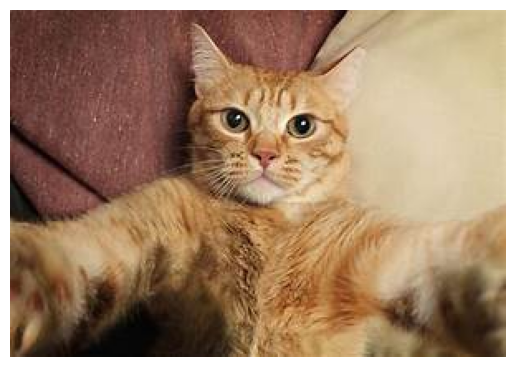

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


# importando la imágen a array

img = Image.open('raw-img/gatto/1.jpeg')


# Representando con matplotlib
def mostrar_imagen(imgagen):
    plt.imshow(imgagen, cmap='gray')
    plt.axis('off')
    plt.show()
    

mostrar_imagen(img)